<a href="https://colab.research.google.com/github/juanchess98/Notebooks-Deep-Learning/blob/Regularizadores/Regularizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
import pandas as pd

In [2]:
# Dataset
# MNIST
mnist_dataset = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
assert x_train.shape == (60000, 28, 28)
assert y_train.shape == (60000,)
assert x_test.shape == (10000, 28, 28)
assert y_test.shape == (10000, )

In [5]:
X_train = x_train / 255.0
X_test = x_test / 255.0

In [6]:
# Se debe hacer reshape para agregarle el canal 
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [7]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
            "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
optimizer = keras.optimizers.Adam()

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=(28,28,1,)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model._name = "Modelo_sin_regularizacion"
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, 
              metrics=["accuracy"])

In [12]:
from functools import partial

RegularizedDenseLayer_l1 = partial(keras.layers.Dense,
                                activation="elu",
                                kernel_initializer="he_normal",
                                kernel_regularizer=keras.regularizers.l1(0.01))
RegularizedDenseLayer_l2 = partial(keras.layers.Dense,
                                activation="elu",
                                kernel_initializer="he_normal",
                                kernel_regularizer=keras.regularizers.l2(0.01))
RegularizedDenseLayer_l1l2 = partial(keras.layers.Dense,
                                activation="elu",
                                kernel_initializer="he_normal",
                                kernel_regularizer=keras.regularizers.l1_l2(0.01))


In [13]:
# L1 Regularization

model_l1 = keras.models.Sequential()
model_l1.add(keras.layers.InputLayer(input_shape=(28,28,1,)))
model_l1.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_l1.add(keras.layers.MaxPool2D(2))
model_l1.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model_l1.add(keras.layers.MaxPool2D(2))
model_l1.add(keras.layers.Flatten())
model_l1.add(RegularizedDenseLayer_l1(128))
model_l1.add(RegularizedDenseLayer_l1(64))
model_l1.add(RegularizedDenseLayer_l1(32))
model_l1.add(RegularizedDenseLayer_l1(10, activation="softmax", 
                                      kernel_initializer="glorot_uniform"))
model_l1._name = "Modelo_L1_Reg"
model_l1.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, 
              metrics=["accuracy"])

In [14]:
# L2 Regularization

model_l2 = keras.models.Sequential()
model_l2.add(keras.layers.InputLayer(input_shape=(28,28,1,)))
model_l2.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_l2.add(keras.layers.MaxPool2D(2))
model_l2.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model_l2.add(keras.layers.MaxPool2D(2))
model_l2.add(keras.layers.Flatten())
model_l2.add(RegularizedDenseLayer_l2(128))
model_l2.add(RegularizedDenseLayer_l2(64))
model_l2.add(RegularizedDenseLayer_l2(32))
model_l2.add(RegularizedDenseLayer_l2(10, activation="softmax", 
                                      kernel_initializer="glorot_uniform"))
model_l2._name = "Modelo_L2_Reg"
model_l2.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, 
              metrics=["accuracy"])

In [15]:
## L1 and L2 Regularization

model_l1l2 = keras.models.Sequential()
model_l1l2.add(keras.layers.InputLayer(input_shape=(28,28,1,)))
model_l1l2.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_l1l2.add(keras.layers.MaxPool2D(2))
model_l1l2.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model_l1l2.add(keras.layers.MaxPool2D(2))
model_l1l2.add(keras.layers.Flatten())
model_l1l2.add(RegularizedDenseLayer_l1l2(128))
model_l1l2.add(RegularizedDenseLayer_l1l2(64))
model_l1l2.add(RegularizedDenseLayer_l1l2(32))
model_l1l2.add(RegularizedDenseLayer_l1l2(10, activation="softmax", 
                                      kernel_initializer="glorot_uniform"))
model_l1l2._name = "Modelo_L1L2_Reg"
model_l1l2.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, 
              metrics=["accuracy"])

In [17]:
## Batch Normalization

model_BN = keras.models.Sequential()
model_BN.add(keras.layers.InputLayer(input_shape=(28,28,1,)))


model_BN.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model_BN.add(keras.layers.MaxPool2D(2))
model_BN.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model_BN.add(keras.layers.MaxPool2D(2))
model_BN.add(keras.layers.Flatten())
model_BN.add(keras.layers.BatchNormalization())
model_BN.add(keras.layers.Dense(128, activation='relu'))
model_BN.add(keras.layers.BatchNormalization())
model_BN.add(keras.layers.Dense(64, activation='relu'))
model_BN.add(keras.layers.BatchNormalization())
model_BN.add(keras.layers.Dense(32, activation='relu'))
model_BN.add(keras.layers.BatchNormalization())
model_BN.add(keras.layers.Dense(10, activation="softmax"))

model_BN._name = "Modelo_BN"
model_BN.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, 
              metrics=["accuracy"])

In [19]:
## Dropout

model_DO= keras.models.Sequential()
model_DO.add(keras.layers.InputLayer(input_shape=(28,28,1,)))


model_DO.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model_DO.add(keras.layers.MaxPool2D(2))
model_DO.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model_DO.add(keras.layers.MaxPool2D(2))
model_DO.add(keras.layers.Flatten())
model_DO.add(keras.layers.Dropout(0.5))
model_DO.add(keras.layers.Dense(128, activation='relu'))
model_DO.add(keras.layers.Dropout(0.5))
model_DO.add(keras.layers.Dense(64, activation='relu'))
model_DO.add(keras.layers.Dropout(0.5))
model_DO.add(keras.layers.Dense(32, activation='relu'))
model_DO.add(keras.layers.Dropout(0.5))
model_DO.add(keras.layers.Dense(10, activation="softmax"))

model_DO._name = "Modelo_DO"
model_DO.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, 
              metrics=["accuracy"])

In [26]:
models = {}
models["Sin_Regularización"] = model
models["Regularización_L1"] = model_l1
models["Regularización_L2"] = model_l2
models["Regularización_L1_L2"] = model_l1l2
models["Batch_Normalization"] = model_BN
models["Dropout"] = model_DO

In [21]:
cb_early_stopping = EarlyStopping(patience=3)

In [27]:
record_histories = {}
for key in models.keys():
  record_histories[key] = models[key].fit(X_train, y_train, epochs=30, batch_size=64, 
                                   validation_split=0.1, callbacks=[cb_early_stopping])

Epoch 1/30
844/844 [==============================] - 35s 4ms/step - loss: 0.4887 - accuracy: 0.8228 - val_loss: 0.3508 - val_accuracy: 0.8718
Epoch 2/30
844/844 [==============================] - 3s 4ms/step - loss: 0.3096 - accuracy: 0.8879 - val_loss: 0.2788 - val_accuracy: 0.8993
Epoch 3/30
844/844 [==============================] - 3s 4ms/step - loss: 0.2604 - accuracy: 0.9041 - val_loss: 0.2699 - val_accuracy: 0.8985
Epoch 4/30
844/844 [==============================] - 3s 4ms/step - loss: 0.2306 - accuracy: 0.9137 - val_loss: 0.2488 - val_accuracy: 0.9078
Epoch 5/30
844/844 [==============================] - 3s 4ms/step - loss: 0.2072 - accuracy: 0.9234 - val_loss: 0.2313 - val_accuracy: 0.9160
Epoch 6/30
844/844 [==============================] - 3s 4ms/step - loss: 0.1855 - accuracy: 0.9320 - val_loss: 0.2350 - val_accuracy: 0.9150
Epoch 7/30
844/844 [==============================] - 3s 4ms/step - loss: 0.1663 - accuracy: 0.9390 - val_loss: 0.2310 - val_accuracy: 0.9212
Epoch


Sin_Regularización


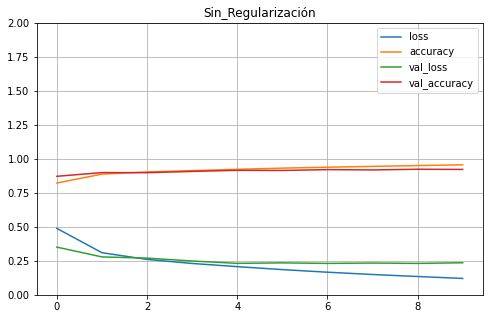


Regularización_L1


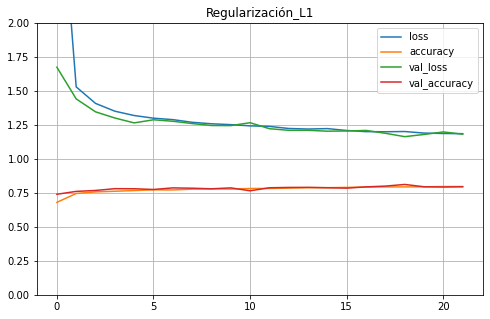


Regularización_L2


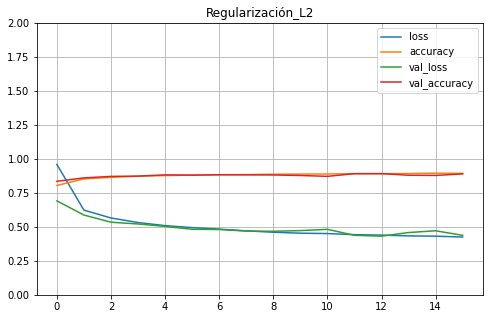


Regularización_L1_L2


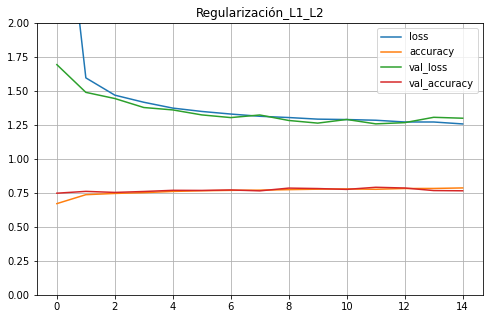


Batch_Normalization


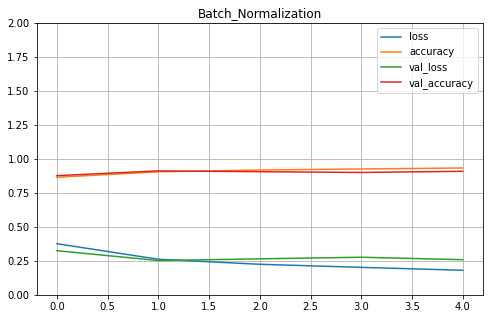


Dropout


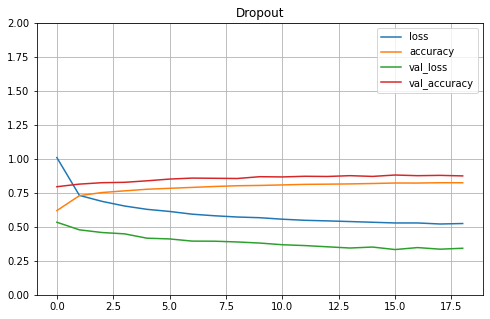

In [29]:
for key in record_histories.keys():
  print(""*50)
  print(key)
  pd.DataFrame(record_histories[key].history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 2)
  plt.title(key)
  plt.show()